In [1]:
import json
import pickle

import numpy as np
import pandas as pd
from scipy.io import loadmat, savemat
from scipy.signal import resample
import matplotlib.pyplot as plt
from tqdm import tqdm

# import dataholders as dh
import tools.utils as utils
import tools.points_processing as pp
import tools.data_generation as dg

In [2]:
with open('data/data16.pickle', 'rb') as f:
    data = pickle.load(f)

df = dg.get_df(data)
df_points = pp.prepare_points()

df = dg.add_labels(df, df_points)

In [ ]:
np.linalg

In [19]:
df['theta'] = np.arccos(df.sonic3 / (df.sonic1**2 + df.sonic2**2 + df.sonic3**2)**(1/2))
df['phi']   = np.arccos(df.sonic2 / (df.sonic1**2 + df.sonic2**2)**(1/2))

In [16]:
df.head()

,time,lowT_av,lwc1V_av,upT_av,sonic1,sonic2,sonic3,low_label,up_label,theta
0,32370,24.309617,0.0,24.278742,-2.219983,-1.460017,0.225008,0,0,2.150201
1,32380,24.137642,0.0,24.162896,-2.071816,-1.527321,0.227560,0,0,2.203187
2,32390,24.159918,0.0,24.204637,-2.030942,-1.438610,0.257130,0,0,2.183357
3,32400,24.195410,0.0,24.216821,-2.111564,-1.480816,0.280000,0,0,2.178296
4,32410,24.009834,0.0,23.998107,-2.180623,-1.488755,0.261626,0,0,2.166507


In [4]:
time_pos, features_pos = dg.generate_positive(df)

100%|██████████████████████████████████████████████████████████████████████| 791858/791858 [00:01<00:00, 572482.28it/s]


In [6]:
# Remove the beginning and the very end of the flight

START = 800000
END   = 7500000
time_neg, features_neg = dg.generate_negative(df[(df.time >= START) & (df.time < END)])

100%|██████████████████████████████████████████████████████████████████████| 670000/670000 [00:02<00:00, 316889.93it/s]


In [8]:
features_pos.shape

(2930, 20, 6)

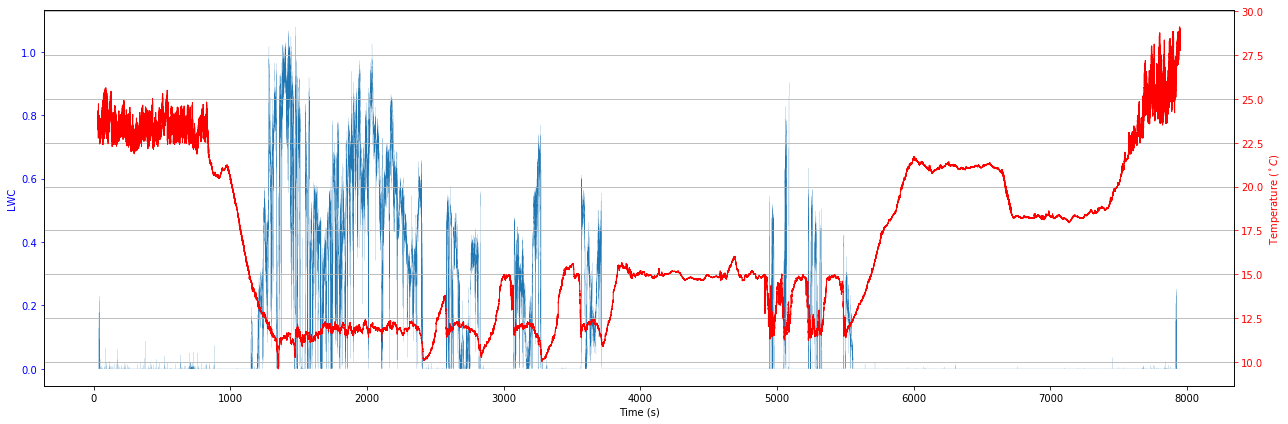

In [92]:
fig, ax1 = plt.subplots()


ax1.plot(df.time//1000, df.lwc1V_av, lw=.1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('LWC', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()

ax2.plot(df.time//1000, df.lowT_av, c='r', lw=1)

ax2.set_ylabel('Temperature ($^\circ C$)', color='r')
ax2.tick_params('y', colors='r')

# ax1.grid()
ax2.grid()

fig.tight_layout()
plt.show()